<a href="https://colab.research.google.com/github/muteenn/CNNtest/blob/main/CNNtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

全体の流れとして

1.画像を(画像,ラベル)にします（教師データの作成）

2.CNNを構築

3,データをCNNへ与える

の3ステップで行います。

まずは基本の読み込みです

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import numpy as np
import os
import glob
import random
from tensorflow.keras import layers, models
from PIL import Image
import matplotlib.pyplot as plot

ここで学習用データのパスとラベルを作ります。

と同時にシャッフルも行っていきます。

ここで学習用の画像を用意します。

今回は恐らくやりやすいであろうgoogle driveからの読み込みとしました。

試しにやって見る場合はMyDrive直下にdataというフォルダを作成して

それぞれの被写体の名前のフォルダを作成、

その中に学習用画像をいれると良いでしょう。
<br><br>
例：みかんとりんごとバナナを学習させる場合

MyDrive/data/mikan

MyDrive/data/ringo

MyDrive/data/banana

のようにフォルダを作成、みかんの画像はmikanに、林檎の画像はringoに、バナナの画像はbananaに...

という風に配置することで動作します。


In [ ]:
ds_path = "/content/drive/MyDrive/data"

print(ds_path)
print(glob.glob(ds_path + "/*"))

cat = [os.path.basename(cnt) for cnt in glob.glob(ds_path + "/data/*")]
cat_dictionary = dict((tag, index) for index,tag in enumerate(cat))

#配列に画像のパスと対応するラベルを記入
train_path = []
data_labels = []
for category in cat:
    for r in glob.glob(ds_path + "/data/" +category + "/*"):
        train_path += [r]
        data_labels += [cat_dictionary[category]]

#ファイルと資料の対応表の辞書を作っておく
train_dict = dict(zip(train_path, data_labels))
#パスをシャッフル
random.shuffle(train_path)

#対応するラベルの配列を作成
label = []
for cnt in train_path:
    label.append(train_dict[cnt])
label = np.array(label)
print(label.shape)


上のパスから画像を取ってきてリサイズなどを行います

ここでtrain_dataを作るわけです

今回は同時にtrain_dataとtest_dataの振り分けも行いました

google driveから画像読み込ませるとしばらく時間がかかるみたいなので、

気長に待つか、もしくはローカルでやります

In [ ]:
image = []
data = []
for cnt,path in enumerate(train_path):
    image.append(Image.open(path))
    image[cnt] = image[cnt].resize(size = (150,150))
    image[cnt] = image[cnt].convert("RGB")
    data.append(np.array(image[cnt]))
print(np.asarray(image[0]).shape)

data = np.array(data)
data = data / 255.0
wari = round(len(data) * 0.8)
train_data = data[:wari]
test_data = data[wari:]
train_label = label[:wari]
test_label = label[wari:]
print(train_data.shape)


学習用モデルを構築します。<br>
今回はCNN（畳み込みニューラルネットワーク）<br>
を用いたモデルを選びました。


In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, len(cat))))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(len(cat), activation = "softmax"))

model.summary()

構築が終わったので学習していきます

今回は5epochsとしました。

In [ ]:
model.compile(optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["acc"]
)
model.fit(train_data, train_label, epochs = 5, validation_data = (test_data, test_label))



学習が終了したので最後に予測を行ってみます。

今回はテストデータの0番目の画像を見てみましょう。

私の環境ではこのような表示になり、

正しい予測が行われたことがわかります。

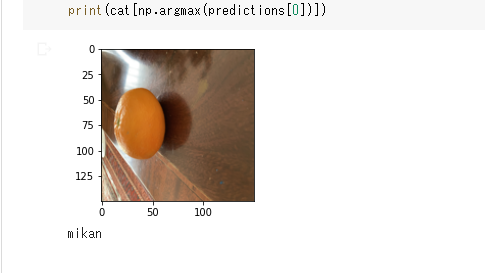

In [ ]:
predictions = model.predict(test_data)

plot.subplot(122).imshow(test_data[0])
plot.show()
print(cat[np.argmax(predictions[0])])

# 最後に

今回はCNNを用いて画像の分類を行いました。

このコードは私が機械学習の勉強用として作成したものなので、

あまり良い書き方をしていない箇所があるかもしれませんが、

参考になれば幸いです。